In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("csc475-575-Spring2022-assignment2.ipynb")

# CSC475/575 Spring 2022 - Assignment 2

This assignment covers topics related to extracting information from audio signals and more specifically the Discrete Fourier Transform. Information about the course can be found at the 
[CSC475/575 Brightspace](https://bright.uvic.ca/d2l/home/196001). 


* A1.1: Plotting of sinusoid with frequency half-way between DFT bins 
* A1.2: Plotting of sinusoid with frequency half-way between DFT bin in dB plus windowing 
* A1.3:   
* A1.4:  
* A1.5:  

CSC575 only (instead of A1.1): 
* A1.G: 

Each question is worth 2 points for a total of 10 points for the assignment. 


In [2]:
import numpy as np
import random
import timeit
import IPython.display as ipd
import matplotlib.pyplot as plt
import math 
%matplotlib inline
import otter
grader = otter.Notebook()


**Question A2.1 (basic):** 
 
Using an existing FFT implementation (np.fft for example) plot the Discrete Fourier Transform (DFT) magnitude of a signal that is a sine wave with frequency exactly equal to the center frequency of DFT bin 60. Assume you are using a sampling rate of 22050Hz and your DFT length is 2048 samples. On the same plot overlay the DFT magnitude response of a sine wave with frequency that would correspond to bin 60.5 (in a sense falling between the crack of two neighbouring frequency bins). Make sure that your x-axis is expressed in Hz. Only plot the positive frequency part and "zoom" close to the bin to see what is happening by setting the x-axis to be between bin 50 and bin 70 (i.e you don’t need to show all the magnitude spectrum just the area around the bin of interest). Write one or two sentences with what you observe in this plot contrasting the sinusoids that falls exactly on the bin and the one that is in between. (**Basic: 2 points**)


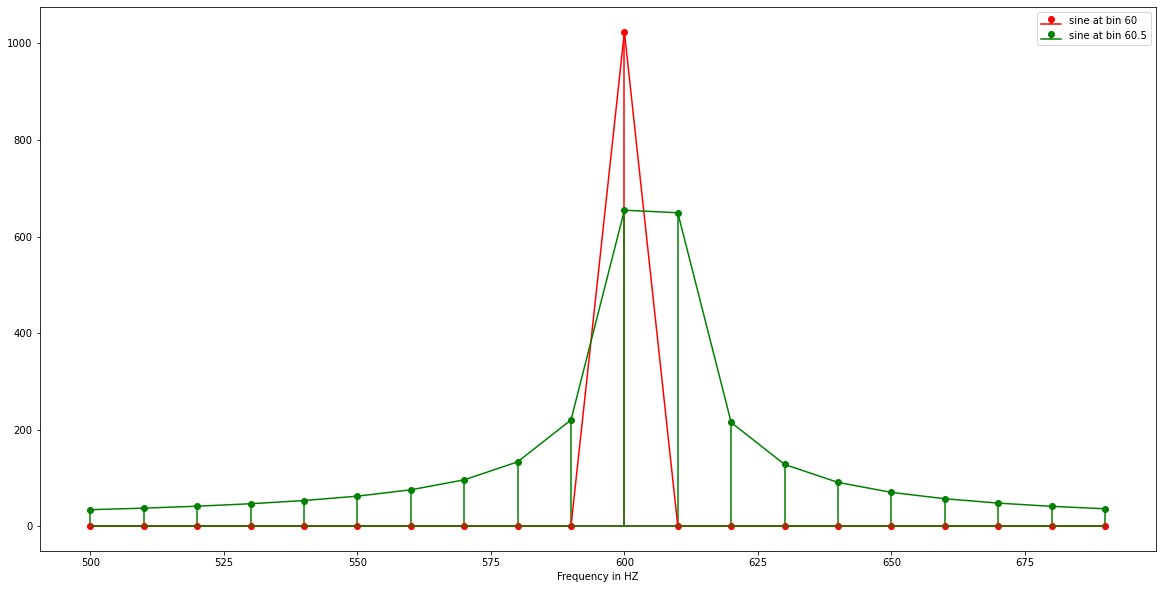

In [4]:
sampling_rate = 22050
DFT_length = 2048
bin_1 = 60
bin_2 = 60.5

#width_bin = sampling_rate/DFT_length

freq_DFT_1 = bin_1
freq_DFT_2 = bin_2

t = np.arange(0,DFT_length)

signal1 = np.sin(2*np.pi*freq_DFT_1*t/DFT_length)
signal2 = np.sin(2*np.pi*freq_DFT_2*t/DFT_length)

X1 = np.fft.fft(signal1)
X2 = np.fft.fft(signal2)

Xmag1 = np.abs(X1)
Xmag2 = np.abs(X2)

start_bin = 50
end_bin = 70
#Converting bin frequency to HZ
t = t*int(sampling_rate/DFT_length)
zoom_t = t[start_bin:end_bin]
zoom_Xmag1 = Xmag1[start_bin:end_bin]
zoom_Xmag2 = Xmag2[start_bin:end_bin]

plt.figure(figsize = (20,10))
plt.xlabel('Frequency in HZ')
plt.stem(zoom_t, zoom_Xmag1, linefmt='r', markerfmt='ro-', basefmt='r')
plt.stem(zoom_t, zoom_Xmag2, linefmt='g', markerfmt='go-', basefmt='g')
plt.legend(['sine at bin 60','sine at bin 60.5'])

We see in the case of input falling between bins the magnitude/energy gets spread to the neighboring frequencies

**Question A2.2 (basic):** 


Repeat question A2.1 but this time do the magnitude plots in decibels (dB). You should also normalize the magnitude by the FFT size (divide the result by 2048 before converting to dB) to get a more accurate reading. It may also be helpful to zoom out a little bit on these plots compared to question A2.1 (55-65 range in bins). 
In addition to the sinusoid at 60, sinusoid at bin 60.5, also plot a windowed sinusoid at bin 60.5. Use a Hanning window of size 2048 prior to taking the DFT. Comment on what you observe on the plot in terms of the effect of windowing to the magnitude spectrum. 

(**Basic: 2 points**)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


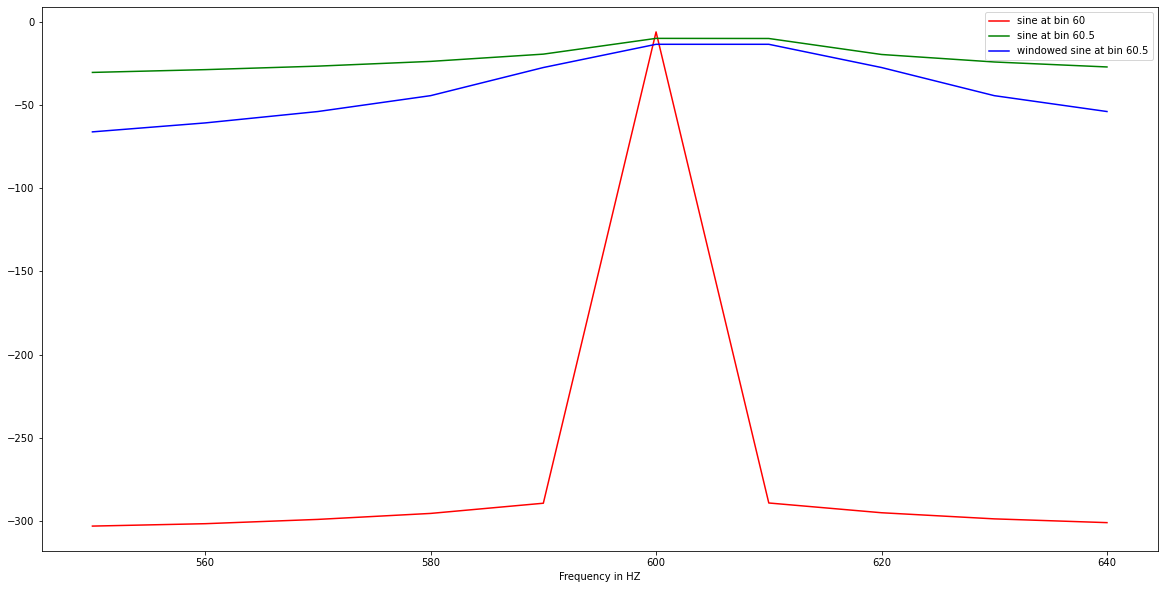

In [5]:
sampling_rate = 22050
DFT_length = 2048
bin_1 = 60
bin_2 = 60.5

freq_DFT_1 = bin_1
freq_DFT_2 = bin_2

t = np.arange(0,DFT_length)

signal1 = np.sin(2*np.pi*freq_DFT_1*t/DFT_length)
signal2 = np.sin(2*np.pi*freq_DFT_2*t/DFT_length)
signal3 = signal2*np.hanning(DFT_length)

X1 = np.fft.fft(signal1)/DFT_length
X2 = np.fft.fft(signal2)/DFT_length
X3 = np.fft.fft(signal3)/DFT_length

Xmag1 = 20*np.log10(X1)
Xmag2 = 20*np.log10(X2)
Xmag3 = 20*np.log10(X3)

start_bin = 55
end_bin = 65
#Converting bin frequency to HZ
t = t*int(sampling_rate/DFT_length)
zoom_t = t[start_bin:end_bin]
zoom_Xmag1 = Xmag1[start_bin:end_bin]
zoom_Xmag2 = Xmag2[start_bin:end_bin]
zoom_Xmag3 = Xmag3[start_bin:end_bin]

plt.figure(figsize = (20,10))
plt.xlabel('Frequency in HZ')
plt.plot(zoom_t,zoom_Xmag1,color='r')
plt.plot(zoom_t,zoom_Xmag2,color='g')
plt.plot(zoom_t,zoom_Xmag3,color='b')
plt.legend(['sine at bin 60','sine at bin 60.5','windowed sine at bin 60.5'])

We see that using a windowed function reduces the spreading energy between neighboring frequencies 

**Question A2.3 (expected):** 

This question explores in more detail how the Discrete Fourier Transform (DFT) works, does some experimental time measuring, and shows how the same principle of taking inner products with a a set of basis functions can be used to create other Transforms on arbitrary frequency grids. These transforms are slow as the FFT can not be used and non-invertible so not widely used but interesting as a way to understand the underlying concepts.

This problem is based on the following implementation of the Discrete Fourier Transform (notice that there is no use of the complex number type in this implementation). If you want to use a different programming language you will have to port this code.

As you can see the `pedagogical_dft` function results in the same magnitude spectrum as the much faster `fft` function from `numpy`. 

Move the computation of the "frequency" terms 2kπ/N from the inner loop to the outer loop. Check that your modified implementation produces the same output as the original and the numpy `fft` by plotting the magnitude spectrum.
**(2 points)** 


[Text(0.5, 1.0, 'updated DFT')]

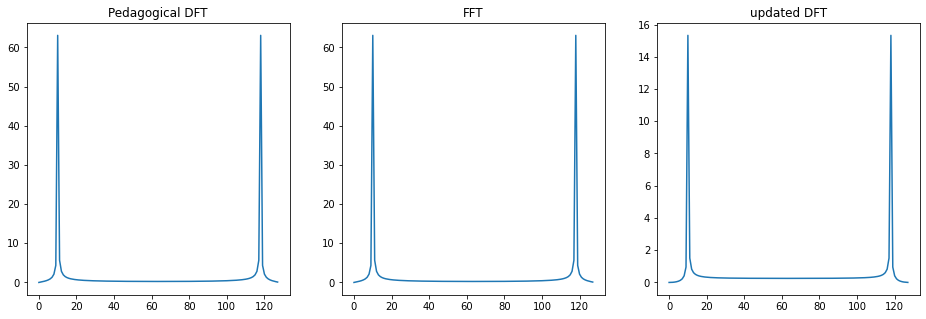

In [26]:
def pedagogical_dft(x, N):
    # array holding the real parts of the spectrum
    X_re = np.zeros(N)
    # array holding the imaginary values of the spectrum
    X_im = np.zeros(N)
    
    for k in np.arange(0,N):
        for t in np.arange(0,N):
            # inner product with real basis k
            X_re[k] += x[t] * np.cos(t * k * 2 * np.pi / N) 
            # inner product with imaginary basis k
            X_im[k] += x[t] * np.sin(t * k * 2 * np.pi / N) 
    
    return (X_re, X_im)

def updated_dft(x, N):
    
    X_re = np.zeros(N)
    X_im = np.zeros(N)
    
    for k in np.arange(0,N):
        freq = 2*k*np.pi/N
        for t in np.arange(0,N):
            X_re[k] += x[t] * np.cos(freq*t)
            X_im[k] += x[t] * np.sin(freq*t)
        
    return (X_re, X_im)

def create_sinusoid(amp, freq, num_samples, rate):
    t = np.linspace(0, num_samples / rate, num_samples)
    return amp * np.sin(2 * np.pi * freq * t)

# Create a sinusoid to test DFTs
srate = 16000
fft_size = 128
bin_freq = srate / fft_size
freq = bin_freq * 10

# Sine wave at bin 10 frequency for 128 bin FFT
x = create_sinusoid(1.0, freq, fft_size, srate)

# Original pedagogical DFT
X1 = pedagogical_dft(x, fft_size)
X1_mag = np.sqrt(X1[0]**2 + X1[1]**2)

# FFT
X2 = np.fft.fft(x, fft_size)
X2_mag = np.abs(X2)

# Updated DFT
X3 = updated_dft(x,fft_size)
X3_mag = np.sqrt(X3[0]**2, X3[1]**2)

# Plot side-by-side
fig, ax = plt.subplots(1,3, figsize=(16,5))
ax[0].plot(X1_mag)
ax[0].set(title="Pedagogical DFT")
ax[1].plot(X2_mag)
ax[1].set(title="FFT")
ax[2].plot(X3_mag)
ax[2].set(title="updated DFT")

<!-- BEGIN QUESTION -->

**Question A2.4 (expected):** 

Let's experimentally measure running times for three configurations: the original pedagogical DFT, the modified one from the previous question, and the Fast Fourier Transform from numpy. Create 1 second of audio at 44100 sampling rate with some noise. Compute the DFT using these three algorithms and measure the different running times. Use the timeit package to do so (import timeit). Use a window size of 2048 samples and iterate over the recording and call the DFT or FFT algorithm for each window. If needed extended the last window with zero padding. **(2 points)**



In [27]:
srate = 44100
duration = 1
freq = 1250
t = np.linspace(0,duration,srate*duration)
data = np.sin(2*np.pi*freq*t)
print("pure audio")
ipd.Audio(data,rate=srate)


pure audio


In [28]:
noise = np.random.normal(0,1.0,len(data))
mix = noise+data
print("noisy audio")
ipd.Audio(mix,rate=srate)

noisy audio


In [29]:
%%time
window_size = 2048

for frame_index in range(0, int(srate/window_size)):
    sx = mix[frame_index*window_size : (frame_index + 1)*window_size]
    X1 = pedagogical_dft(sx,len(sx))

Wall time: 8min 33s


In [30]:
%%time
window_size = 2048

for frame_index in range(0, int(srate/window_size)):
    sx = mix[frame_index*window_size : (frame_index + 1)*window_size]
    X2 = np.fft.fft(sx,len(sx))

Wall time: 2 ms


In [35]:
%%time
window_size = 2048

for frame_index in range(0, int(srate/window_size)):
    sx = mix[frame_index*window_size : (frame_index + 1)*window_size]
    X3 = updated_dft(sx,len(sx))

Wall time: 3min 52s


Comparing the running time of all 3 configuration shows the highest run time of 8min 33s for the pedagogical_dft. Switching the calculation of freq term to the outer loops leads in an improvement, the updated dft took 3min 52s to run
But the best of them all - FFT took a mere 2 ms to run

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question A2.5 (advanced):** 

Modify the DFT function so that it takes as an extra argument a list of frequencies in Hz for the basis functions rather than computing these frequencies (you may also need to add the sample rate). You will need to convert these frequencies to radians per second inside the function. Call your new function with an appropriately defined list so that the output is the same as the original pedagogicalDFT function and check that the results are the same. 

Compare that your modified DFT returns the same results as the standard numpy FFT with an appropriately defined list of frequencies 
and plotting the corresponding magnitude spectrum. 

Write a function octave_transform in which you call the function you defined in the previous question with a list of frequencies that are each spaced by an octave starting from the frequency corresponding to bin 1 from the regular DFT. Select a 2048 sample long window from a recording of music or a single musical instrument and plot the magnitude spectrum of this octave transform alongside a regular DFT (or FFT). Try selecting a window with a stable pitched sound to see the harmonics from the sound in your plot (ie, don't just select the first 2048 samples from your recording). The frequency axis will be different for each transform, so easiest will be to create separate plots for your comparison. Notice that this transform is slow as it can not take advantage of the FFT and not invertible, but still interesting as a way to understand the underlying concepts. **(2 points)**


In [43]:
def precalculatedfreq_dft(x, N, freqs):
    # array holding the real parts of the spectrum
    X_re = np.zeros(N)
    # array holding the imaginary values of the spectrum
    X_im = np.zeros(N)
    
    for k in np.arange(0,N):
        temp_freq = freqs[k]
        for t in np.arange(0,N):
            # inner product with real basis k
            X_re[k] += x[t] * np.cos(t * temp_freq) 
            # inner product with imaginary basis k
            X_im[k] += x[t] * np.sin(t * temp_freq) 
    
    return (X_re, X_im)

def create_sinusoid(amp, freq, num_samples, rate):
    t = np.linspace(0, num_samples / rate, num_samples)
    return amp * np.sin(2 * np.pi * freq * t)

# Create a sinusoid to test DFTs
srate = 16000
fft_size = 128
bin_freq = srate / fft_size
freq = bin_freq * 10

# Sine wave at bin 10 frequency for 128 bin FFT
x = create_sinusoid(1.0, freq, fft_size, srate)

# List of frequencies in HZ precalculated
freqs = []
for k in np.arange(0,fft_size):
    freqs.append(k*2*np.pi/fft_size)

[Text(0.5, 1.0, 'Pedagogical DFT')]

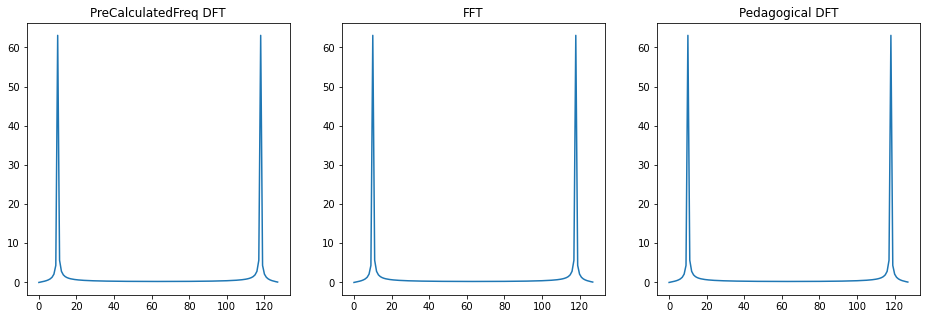

In [44]:
# Precalculated frequency DFT
X1 = precalculatedfreq_dft(x, fft_size, freqs)
X1_mag = np.sqrt(X1[0]**2 + X1[1]**2)

X2 = np.fft.fft(x, fft_size)
X2_mag = np.abs(X2)

X3 = pedagogical_dft(x, fft_size)
X3_mag = np.sqrt(X1[0]**2 + X1[1]**2)

fig, ax = plt.subplots(1,3, figsize=(16,5))
ax[0].plot(X1_mag)
ax[0].set(title="PreCalculatedFreq DFT")
ax[1].plot(X2_mag)
ax[1].set(title="FFT")
ax[2].plot(X3_mag)
ax[2].set(title="Pedagogical DFT")

In [48]:
%%time
X1 = precalculatedfreq_dft(x, fft_size, freqs)

Wall time: 88 ms


In [49]:
%%time
X4 = updated_dft(x,fft_size)

Wall time: 44 ms


In [50]:
%%time
X3 = pedagogical_dft(x, fft_size)

Wall time: 95 ms


In [51]:
%%time
X2 = np.fft.fft(x, fft_size)

Wall time: 0 ns


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question A2.G (CSC575/advanced):** 

This question only needs to be answered by graduate students who are registered in CSC575 and for these students it will be graded instead of question A2.1 which is optional for them. 

Consider the following complex amplitudes (magnitude and phase) that have been measured to approximate the vowel sound “ah”. Assume that the sampling rate is 8000Hz.

| k | $f_k (Hz)$ | $X_k$               | Mag   | Phase (rad) |
| - | ---------- | ------------------- | ----- |------------ |
| 1 | 100        | 0                   | 0     | 0           |
| 2 | 200        | (771 + j12202)      | 12226  | 1.508       |
| 3 | 300        | 0                   | 0     | 0           |
| 4 | 400        | (-8865 + j28048)    | 29416 | 1.876       |
| 5 | 500        | (48001 + j 8995)    | 48836 | -0.185      |

**3a**

Synthesize 3 seconds of this vowel and listen to the resulting audio. You can either directly use sinusoidal oscillators or prepare an appropriate complex spectrum and then perform the inverse Discrete Fourier Transform.





In [ ]:
# Your great detector of waveform type 

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [36]:
grader.check_all()

KeyError: 'otter'

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()